In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import sklearn
sklearn.__version__

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import math
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.svm import SVR

In [2]:
arr = pd.read_csv("arrival_merged.csv", delimiter = ',')
arr.head(5)

,Unnamed: 0,V1,CarrierCode,date,FlightNumber,TailNumber,OriginAirport,ScheduledArrivalTime,ActualArrivalTime,ScheduledElapsedTimeMinutes,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,0,9,AA,2016-01-01,1116,N005AA,LAX,6:13:00,5:57:00,253,...,0,15,22,87,0.0,1023,3,10,317,11
1,1,57876,DL,2016-01-01,1098,N127DL,SFO,6:20:00,6:11:00,265,...,0,15,22,87,0.0,1023,3,10,317,11
2,2,57917,DL,2016-01-01,1254,N551NW,LAX,6:00:00,5:47:00,245,...,0,15,22,87,0.0,1023,3,10,317,11
3,3,57943,DL,2016-01-01,1354,N1611B,LAX,6:54:00,6:41:00,244,...,0,15,22,87,0.0,1023,3,10,317,11
4,4,1106367,NK,2016-01-01,806,N506NK,LAS,6:20:00,6:19:00,230,...,0,15,22,87,0.0,1023,3,10,317,11


In [3]:
arr.drop("Unnamed: 0", axis=1, inplace=True)
arr.shape

(1288202, 44)

In [4]:
# Finding and extracting the canceled flights
canceled_data = arr[arr['TailNumber']==' ']
print("Number of canceled flights: ", canceled_data.shape[0])

arr_non_canceled = arr[arr['TailNumber']!=' ']  # Extracting non-canceled flights
print("\n")
print("Shape of non_canceled data: ", arr_non_canceled.shape)

Number of canceled flights:  8842


Shape of non_canceled data:  (1279360, 44)


In [5]:
arr_non_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279360 entries, 0 to 1288201
Data columns (total 44 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   V1                                  1279360 non-null  int64  
 1   CarrierCode                         1279360 non-null  object 
 2   date                                1279360 non-null  object 
 3   FlightNumber                        1279360 non-null  int64  
 4   TailNumber                          1279360 non-null  object 
 5   OriginAirport                       1279360 non-null  object 
 6   ScheduledArrivalTime                1279360 non-null  object 
 7   ActualArrivalTime                   1279360 non-null  object 
 8   ScheduledElapsedTimeMinutes         1279360 non-null  int64  
 9   ActualElapsedTimeMinutes            1279360 non-null  int64  
 10  ArrivalDelayMinutes                 1279360 non-null  int64  
 11  WheelsonTim

In [6]:
arr_non_canceled.drop(['V1','DelayWeatherMinutes','OriginAirport','CarrierCode','date', 'FlightNumber', 'ScheduledArrivalTime', 'ActualArrivalTime', 'ScheduledElapsedTimeMinutes', 'ActualElapsedTimeMinutes', 'WheelsonTime', 'time', 'city','moonrise', 'moonset','sunrise','sunset'], axis = 1, inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
arr_non_canceled.shape

(1279360, 27)

In [8]:
target = arr_non_canceled['ArrivalDelayMinutes']
TailNumber = arr_non_canceled['TailNumber']
ArrivalAirport = arr_non_canceled['ArrivalAirport']
arr_non_canceled.drop(['ArrivalDelayMinutes', 'TailNumber', 'ArrivalAirport'], axis=1, inplace = True)

In [9]:
target[target < 15]= 0
target[target >= 15]= 1

<ipython-input-9-26e56633f944>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[target < 15]= 0
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-9-26e56633f944>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[target >= 15]= 1


In [10]:
target.value_counts()

0    1044636
1     234724
Name: ArrivalDelayMinutes, dtype: int64

In [11]:
arr_non_canceled.info()
arr_non_canceled.drop("ArrivalDelayMinutes",axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279360 entries, 0 to 1288201
Data columns (total 25 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   TaxiIntimeMinutes                   1279360 non-null  int64  
 1   DelayCarrierMinutes                 1279360 non-null  int64  
 2   DelayNationalAviationSystemMinutes  1279360 non-null  int64  
 3   DelaySecurityMinutes                1279360 non-null  int64  
 4   DelayLateAircraftArrivalMinutes     1279360 non-null  int64  
 5   maxtempC                            1279360 non-null  int64  
 6   mintempC                            1279360 non-null  int64  
 7   totalSnow_cm                        1279360 non-null  float64
 8   sunHour                             1279360 non-null  float64
 9   uvIndex                             1279360 non-null  int64  
 10  moon_illumination                   1279360 non-null  int64  
 11  DewPointC  

In [12]:
arr_non_canceled.shape

(1279360, 24)

In [13]:
from sklearn.preprocessing import StandardScaler as scaler
data_scaled = scaler().fit_transform(arr_non_canceled)

In [14]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = arr_non_canceled.columns

In [15]:
data_scaled.head(5)

,TaxiIntimeMinutes,DelayCarrierMinutes,DelayNationalAviationSystemMinutes,DelaySecurityMinutes,DelayLateAircraftArrivalMinutes,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,-0.049137,-0.134857,-0.211404,-0.01312,-0.177469,-1.49577,-1.272835,-0.084353,-0.789039,-1.037103,...,-1.650574,-0.137816,-0.273833,1.230534,-0.26281,1.058902,-1.634144,0.373845,1.345965,-0.138201
1,-0.182780,-0.134857,-0.211404,-0.01312,-0.177469,-1.49577,-1.272835,-0.084353,-0.789039,-1.037103,...,-1.650574,-0.137816,-0.273833,1.230534,-0.26281,1.058902,-1.634144,0.373845,1.345965,-0.138201
2,-0.583706,-0.134857,-0.211404,-0.01312,-0.177469,-1.49577,-1.272835,-0.084353,-0.789039,-1.037103,...,-1.650574,-0.137816,-0.273833,1.230534,-0.26281,1.058902,-1.634144,0.373845,1.345965,-0.138201
3,-0.450064,-0.134857,-0.211404,-0.01312,-0.177469,-1.49577,-1.272835,-0.084353,-0.789039,-1.037103,...,-1.650574,-0.137816,-0.273833,1.230534,-0.26281,1.058902,-1.634144,0.373845,1.345965,-0.138201
4,3.024633,-0.134857,-0.211404,-0.01312,-0.177469,-1.49577,-1.272835,-0.084353,-0.789039,-1.037103,...,-1.650574,-0.137816,-0.273833,1.230534,-0.26281,1.058902,-1.634144,0.373845,1.345965,-0.138201


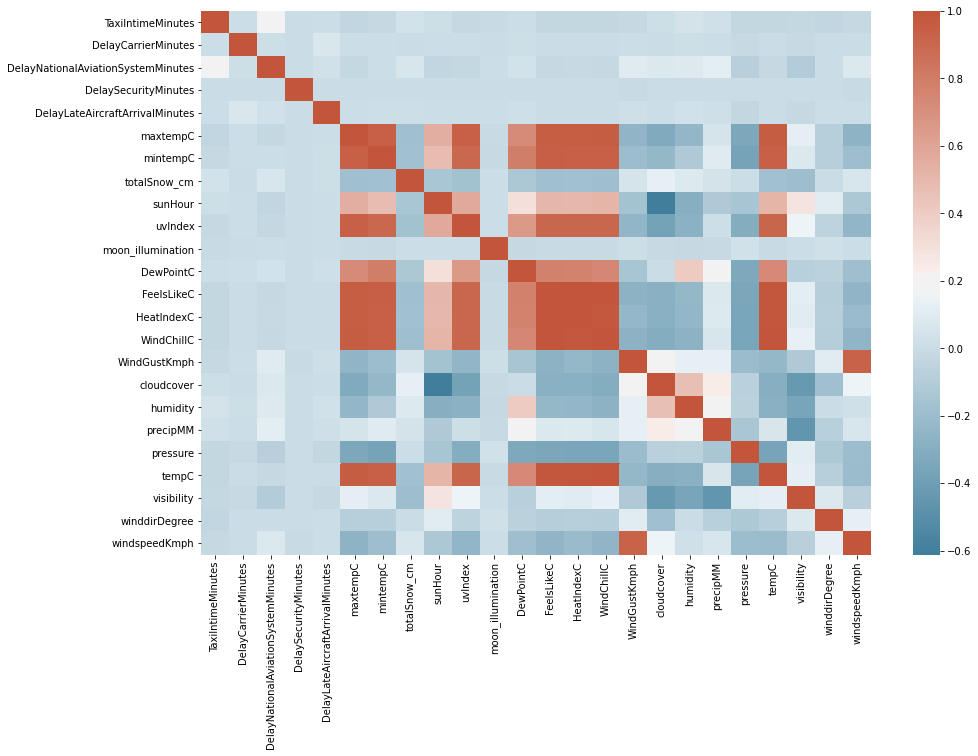

In [42]:
corrplot = data_scaled.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrplot, cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [44]:
#data_scaled.to_csv("arrival_data_scaled.csv", index=False)

In [19]:
#target.to_csv("target.csv",index=False)

In [16]:
df = pd.read_csv("arrival_data_scaled.csv", delimiter=',')

In [17]:
#target = pd.read_csv("target.csv", delimiter = ',')
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: ArrivalDelayMinutes, dtype: int64

In [21]:

X_train, X_val, y_train, y_val = train_test_split(df, target, test_size=0.30, random_state=2198)



In [25]:
"""
The function classification_models fit the model with the best parameters. Calculates the model accuracy score 
on both training and validation sets. Displays the confusion matrix and computes the classification report to 
measure the performance of the model on the validation set.

The functions RandomForest_Hypermarameter, SVC_Hypermarameter, Decision_Tree_model_hp, AdaBoost_model_hp identifies
the best parameters and calls the classification_models to compute the statistics. 


"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.svm import SVC

def classification_models(X_train, y_train, X_val, y_val, hp = False, RandomForest = False, NB = False, GBC = False, XGB = False, DT = False, AdaBoost = False):
    """
Returns the model accuracy on train and validation data. Plots the confusion matrix and print classification reprt.
      
      Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
                  hp (boolean): Set true to fit model with best parameters
                  RandomForest: Set true to fit the RandomForest model
                  SVC_RBF:  Set true to fit the RBF kernel SVC model
                  SVC_linear: Set true to fit the Linear kernel SVC model
                  SVC_polynomial: Set true to fit the Polynomial kernel SVC model
                  DT: Set true to fit the Decision tree model
                  AdaBoost: Set true to fit the AdaBoost model
  """
    if(hp == False):
        if (RandomForest == True):
            model = RandomForestClassifier()    # Fit default RandomForest model
            model.fit(X_train, y_train)
        elif (NB == True):
            model = GaussianNB()         # Fit default Naive Bayes model
            model.fit(X_train, y_train)
        elif (GBC == True):
            model = GradientBoostingClassifier()       # Fit default Gradient boosting model
            model.fit(X_train, y_train)
        elif (XGB == True):
            model = XGBClassifier()        # Fit default XGB model
            model.fit(X_train, y_train)
        elif (DT == True):
            model = DecisionTreeClassifier()    # Fit default Decision tree model
            model.fit(X_train, y_train)
        elif (AdaBoost == True):              # Fit default AdaBoost model
            model = AdaBoostClassifier()
            model.fit(X_train, y_train)

    else:
        if (RandomForest == True):
            max_depth_input = int(input('Enter max_depth: '))
            min_samples_split_input = int(input('Enter min_samples_split: '))
      
      # Fit the RandomForest model with best parameters
            model = RandomForestClassifier(max_depth = max_depth_input, min_samples_split = min_samples_split_input)
            model.fit(X_train, y_train)   
        elif (DT == True):
            max_depth_input = int(input('Enter max_depth: '))
            min_samples_split_input = int(input('Enter min_samples_split: '))

      # Fit the RandomForest model with best parameters
            model = DecisionTreeClassifier(max_depth = max_depth_input, min_samples_split = min_samples_split_input)
            model.fit(X_train, y_train)
        elif (AdaBoost == True):
            learning_rate_input = float(input('Enter Optimal learning rate: '))

      # Fit the AdaBoost classifier with optimal learning rate
            model = AdaBoostClassifier(n_estimators=100, learning_rate=learning_rate_input)
            model.fit(X_train, y_train)
        elif (GBC == True):
            learning_rate_input = float(input('Enter Optimal learning rate: '))
        
        # Fit the Gradient Boosting classifier with optimal learning rate
            model = GradientBoostingClassifier(n_estimators = 100, learning_rate=learning_rate_input)
            model.fit(X_train, y_train)
        elif (XGB == True):
            max_depth_input = int(input('Enter max_depth: '))
            learning_rate_input = float(input('Enter Optimal learning rate: '))
        
        # Fit XGB with optimal parameters
            model = XGBClassifier(learning_rate = learning_rate_input, max_depth = max_depth_input)
            model.fit(X_train, y_train)
        

    model_pred_train = model.predict(X_train)  # Predict and calculate accuracy on train data
    print('Accuracy score of train data: ', metrics.accuracy_score(y_true = y_train, y_pred = model_pred_train))
    print('\n')

    model_pred_test = model.predict(X_val)    # Predict and calculate accuracy on validation data
    print('Accuracy score of test data: ', metrics.accuracy_score(y_true = y_val, y_pred = model_pred_test))
    print('-------------------------------------------------------------------------------------------------------------------')

  #Confusion matrix
    confusion_matrix =  pd.crosstab(index=y_val, columns=model_pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    print(confusion_matrix)
    plt.title("Confusion Matrix for test data", fontsize = 15)
    plt.show()

  # Print classification report
    print('Classification report of default Random forest model: ')
    print(metrics.classification_report(y_val, model_pred_test))



def RandomForest_Hypermarameter(X_train, y_train, X_val, y_val):
    """
  Computes the optimal max_depth and min_samples_split and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
    """
    RF_hp = RandomForestClassifier()
    parameters = {
        'max_depth': [2,4,6,8,10],
        'min_samples_split': [8,10,12,14,16,20]
  }
    GSC = GridSearchCV(RF_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of RandomForest model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, RandomForest = True)



def Decision_Tree_model_hp(X_train, y_train, X_val, y_val):
    """
  Computes the optimal max_depth and min_samples_split and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

    """
    DT_hp = DecisionTreeClassifier()
    parameters = {
        'max_depth': [2,4,6,8,10],
        'min_samples_split': [8,10,12,14,16,20]
  }
    GSC = GridSearchCV(DT_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of Decision Trees model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, DT = True)


def AdaBoost_model_hp(X_train, y_train, X_val, y_val):
    """
  Computes the optimal learning rate and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

    """
    AB_hp = AdaBoostClassifier()
    parameters = {
        'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}
    GSC = GridSearchCV(AB_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of AdaBoost model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, AdaBoost = True)


def GradientBoosting_model_hp(X_train, y_train, X_val, y_val):
    """
  Computes the optimal learning rate and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

    """
    GBC_hp = GradientBoostingClassifier()
    parameters = {
        'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}
    GSC = GridSearchCV(GBC_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of Gradient Boosting model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, GBC = True)
    

def XGB_model_hp(X_train, y_train, X_val, y_val):
    """
  Computes the optimal max_depth and learning_rate and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

    """
    xgb_hp = XGBClassifier()
    parameters = {
        'max_depth': [2,4,6,8,10],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1]
  }
    GSC = GridSearchCV(xgb_hp, parameters, scoring = 'precision', n_jobs = -1)
    GSC.fit(X_train, y_train)
    print('Best parameters of XBG model: ', GSC.best_params_)
    classification_models(X_train, y_train, X_val, y_val, hp = True, XGB = True)

Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313465      0
1               0  70343


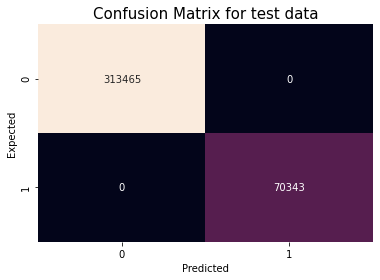

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313465
           1       1.00      1.00      1.00     70343

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [20]:
# Initiating default Random Forest classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, RandomForest = True)


Accuracy score of train data:  0.9987315086114485


Accuracy score of test data:  0.9987884567283641
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313000    465
1               0  70343


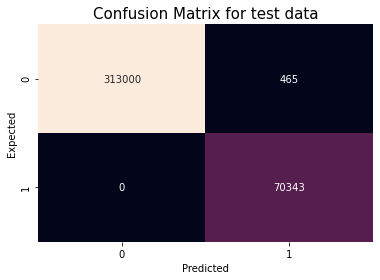

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313465
           1       0.99      1.00      1.00     70343

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [21]:
# Initiating default Naive Bayes Classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, NB = True)


Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313465      0
1               0  70343


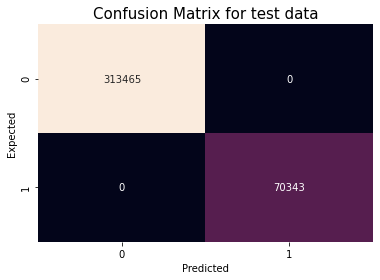

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313465
           1       1.00      1.00      1.00     70343

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [22]:
# Initiating default Gradient Boosting Classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, GBC = True)


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313465      0
1               0  70343


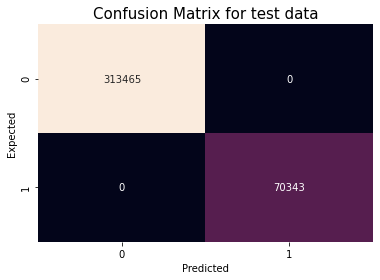

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313465
           1       1.00      1.00      1.00     70343

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [23]:
# Initiating default XGB classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, XGB = True)


Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313465      0
1               0  70343


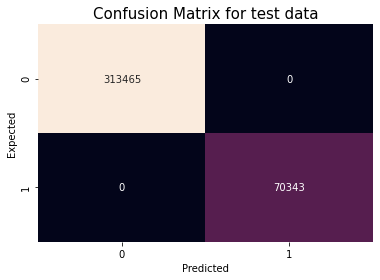

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313465
           1       1.00      1.00      1.00     70343

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [24]:
# Initiating Decision tree classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, DT = True)


Accuracy score of train data:  1.0


Accuracy score of test data:  1.0
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313465      0
1               0  70343


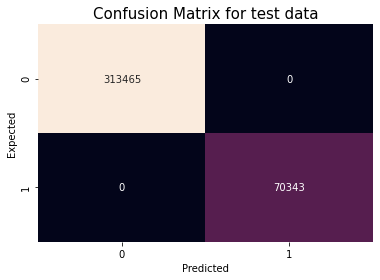

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313465
           1       1.00      1.00      1.00     70343

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [25]:
# Initiating AdaBoost Classifier
classification_models(X_train, y_train, X_val, y_val, hp = False, AdaBoost = True)


## Hyperparameter Tuning

Best parameters of RandomForest model:  {'max_depth': 2, 'min_samples_split': 8}
Enter max_depth: 2
Enter min_samples_split: 8
Accuracy score of train data:  0.9488427249338955


Accuracy score of test data:  0.948862452059363
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313465      0
1           19627  50716


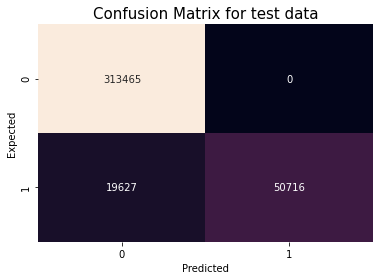

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    313465
           1       1.00      0.72      0.84     70343

    accuracy                           0.95    383808
   macro avg       0.97      0.86      0.90    383808
weighted avg       0.95      0.95      0.95    383808



In [31]:
RandomForest_Hypermarameter(X_train, y_train, X_val, y_val)

Best parameters of Decision Trees model:  {'max_depth': 2, 'min_samples_split': 8}
Enter max_depth: 2
Enter min_samples_split: 8
Accuracy score of train data:  0.9800045111841635


Accuracy score of test data:  0.9801385067533767
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313496      0
1            7623  62689


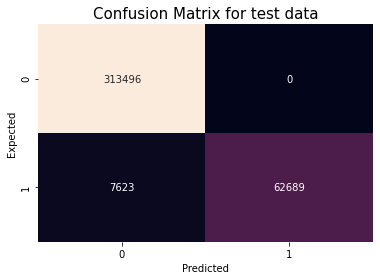

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    313496
           1       1.00      0.89      0.94     70312

    accuracy                           0.98    383808
   macro avg       0.99      0.95      0.97    383808
weighted avg       0.98      0.98      0.98    383808



In [24]:
Decision_Tree_model_hp(X_train, y_train, X_val, y_val)

Best parameters of AdaBoost model:  {'learning_rate': 0.0001}
Enter Optimal learning rate: 0.0001
Accuracy score of train data:  0.9318275209033088


Accuracy score of test data:  0.9320441470735368
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313496      0
1           26082  44230


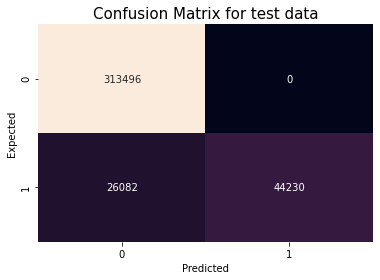

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    313496
           1       1.00      0.63      0.77     70312

    accuracy                           0.93    383808
   macro avg       0.96      0.81      0.87    383808
weighted avg       0.94      0.93      0.93    383808



In [26]:
AdaBoost_model_hp(X_train, y_train, X_val, y_val)

Best parameters of Gradient Boosting model:  {'learning_rate': 0.01}
Enter Optimal learning rate: 0.01
Accuracy score of train data:  0.997790189737726


Accuracy score of test data:  0.997652472069368
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313496      0
1             901  69411


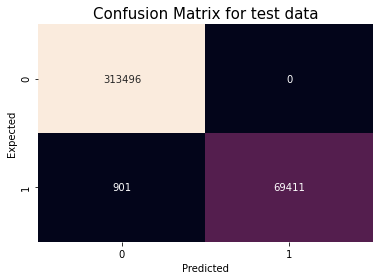

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313496
           1       1.00      0.99      0.99     70312

    accuracy                           1.00    383808
   macro avg       1.00      0.99      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [27]:
GradientBoosting_model_hp(X_train, y_train, X_val, y_val)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:08:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters of XBG model:  {'learning_rate': 0.0001, 'max_depth': 2}
Enter max_depth: 2
Enter Optimal learning rate: 0.0001
[12:12:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of train data:  0.9800045111841635


Accuracy score of test data:  0.9801385067533767
-------------------------------------------------

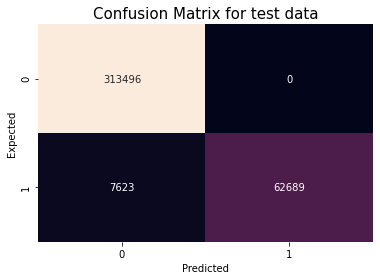

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    313496
           1       1.00      0.89      0.94     70312

    accuracy                           0.98    383808
   macro avg       0.99      0.95      0.97    383808
weighted avg       0.98      0.98      0.98    383808



In [55]:
XGB_model_hp(X_train, y_train, X_val, y_val)

In [57]:
# b) Mlxtend Feature selection technique
# Identifying top 25 most significant columns

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 14)
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   29.5s finished

[2021-05-30 22:01:07] Features: 1/5 -- score: 0.9319481168053679[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   34.2s finished

[2021-05-30 22:01:41] Features: 2/5 -- score: 0.9800413592074566[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   37.7s finished

[2021-05-30 22:02:19] Features: 3/5 -- score: 0.9977723237054544[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [59]:
# List of top 5 columns selected by MLXtend

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 5]


Predicted       0      1
Expected                
0          313465      0
1               0  70343


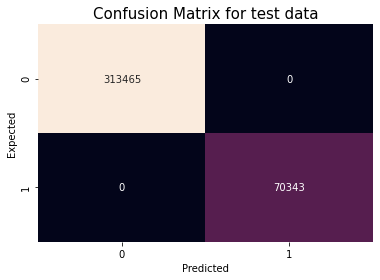

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313465
           1       1.00      1.00      1.00     70343

    accuracy                           1.00    383808
   macro avg       1.00      1.00      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [70]:
# Build decision tree classifier with top 5 selected features
clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 14)
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
#print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_val.iloc[:, feat_cols])
#print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

confusion_matrix =  pd.crosstab(index=y_val, columns=y_test_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
print(confusion_matrix)
plt.title("Confusion Matrix for test data", fontsize = 15)
plt.show()

print('Classification report of default Random forest model: ')
print(metrics.classification_report(y_val, y_test_pred))

In [72]:
df2 = data_scaled.drop("DelayWeatherMinutes", axis=1)

In [73]:

X_train2, X_val2, y_train2, y_val2 = train_test_split(df2, target, test_size=0.30, random_state=16792)


Best parameters of Decision Trees model:  {'max_depth': 4, 'min_samples_split': 8}
Enter max_depth: 4
Enter min_samples_split: 8
Accuracy score of train data:  0.9978516043736154


Accuracy score of test data:  0.997928651825913
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          313553      0
1             795  69460


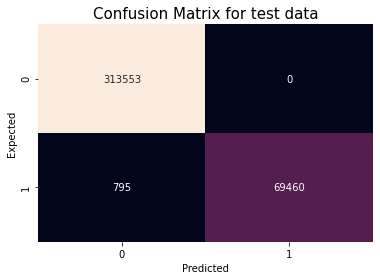

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    313553
           1       1.00      0.99      0.99     70255

    accuracy                           1.00    383808
   macro avg       1.00      0.99      1.00    383808
weighted avg       1.00      1.00      1.00    383808



In [111]:
Decision_Tree_model_hp(X_train2, y_train2, X_val2, y_val2)

In [112]:
target_lst = ["On time", "Delayed"]

In [28]:

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth = 2, min_samples_split = 8)
rnd_clf.fit(X_train, y_train)
for name, importance in zip(X_train.columns, rnd_clf.feature_importances_):
    print(name, "=", importance)

TaxiIntimeMinutes = 0.09486648548921509
DelayCarrierMinutes = 0.17557809762914747
DelayNationalAviationSystemMinutes = 0.33247599036484243
DelaySecurityMinutes = 0.004740963218210695
DelayLateAircraftArrivalMinutes = 0.2165124824935567
maxtempC = 0.0
mintempC = 0.001218755345488814
totalSnow_cm = 0.0009550402614541858
sunHour = 0.00020202582916996383
uvIndex = 0.0
moon_illumination = 0.0
DewPointC = 0.007140251934195579
FeelsLikeC = 0.0019052782894360446
HeatIndexC = 0.0015656887995802833
WindChillC = 0.0020639885367528376
WindGustKmph = 0.0039023772026803155
cloudcover = 0.0014330399575248876
humidity = 0.0412902303020015
precipMM = 0.05631594374222484
pressure = 0.020840552178766108
tempC = 0.0007404344695753287
visibility = 0.034644861854254826
winddirDegree = 0.0
windspeedKmph = 0.0016075121019221835


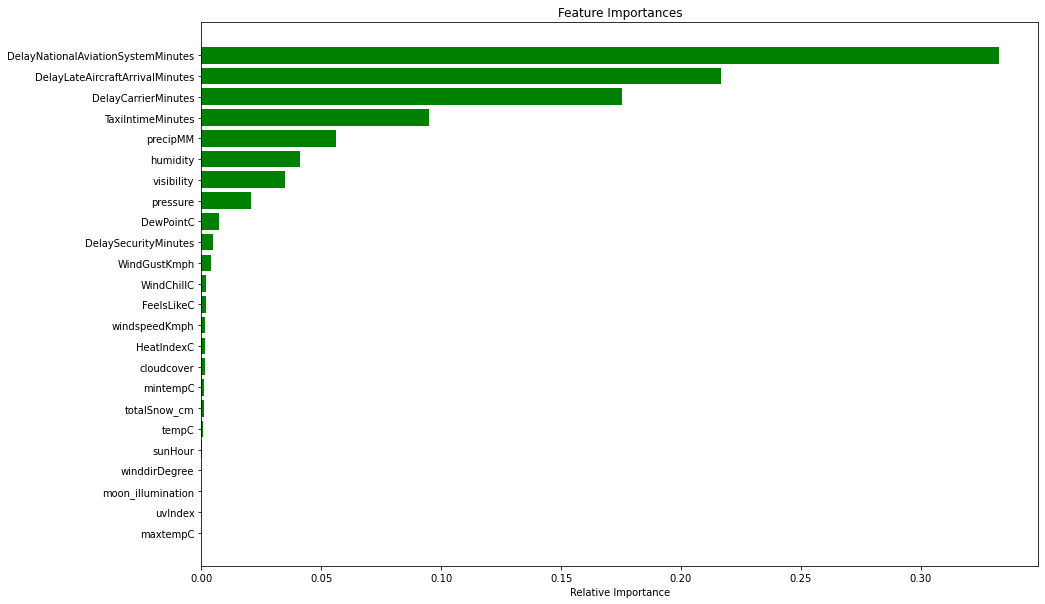

In [35]:
features = X_train.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [53]:
dt_clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 8)
dt_clf.fit(X_train, y_train)
for name, importance in zip(X_train.columns, dt_clf.feature_importances_):
    print(name, "=", importance)

TaxiIntimeMinutes = 0.0
DelayCarrierMinutes = 0.29363850415226916
DelayNationalAviationSystemMinutes = 0.5883737534560158
DelaySecurityMinutes = 0.0008492166291406286
DelayLateAircraftArrivalMinutes = 0.11713852576257436
maxtempC = 0.0
mintempC = 0.0
totalSnow_cm = 0.0
sunHour = 0.0
uvIndex = 0.0
moon_illumination = 0.0
DewPointC = 0.0
FeelsLikeC = 0.0
HeatIndexC = 0.0
WindChillC = 0.0
WindGustKmph = 0.0
cloudcover = 0.0
humidity = 0.0
precipMM = 0.0
pressure = 0.0
tempC = 0.0
visibility = 0.0
winddirDegree = 0.0
windspeedKmph = 0.0


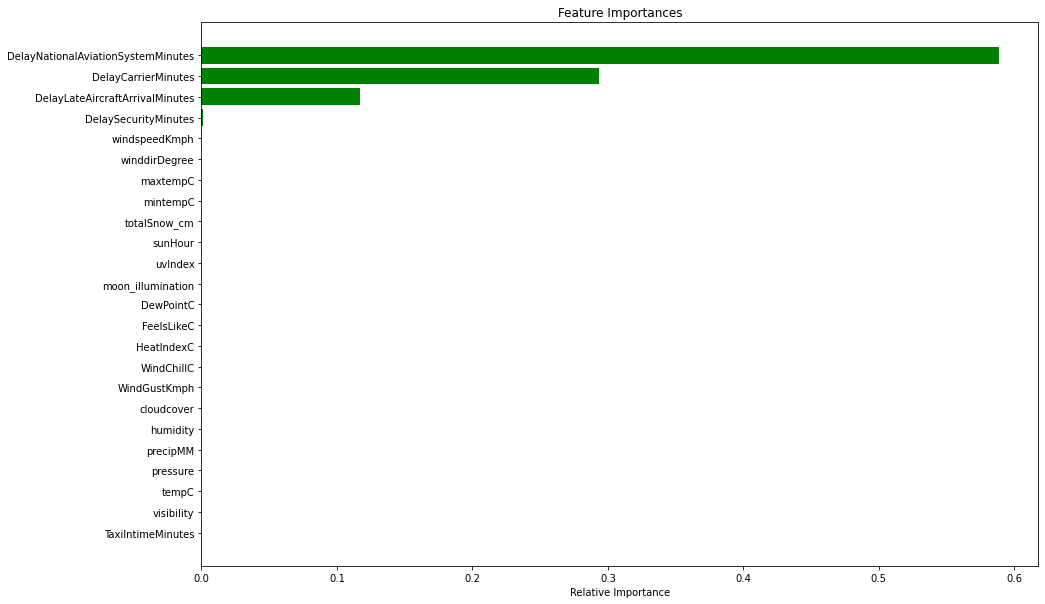

In [54]:
features = X_train.columns
importances = dt_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

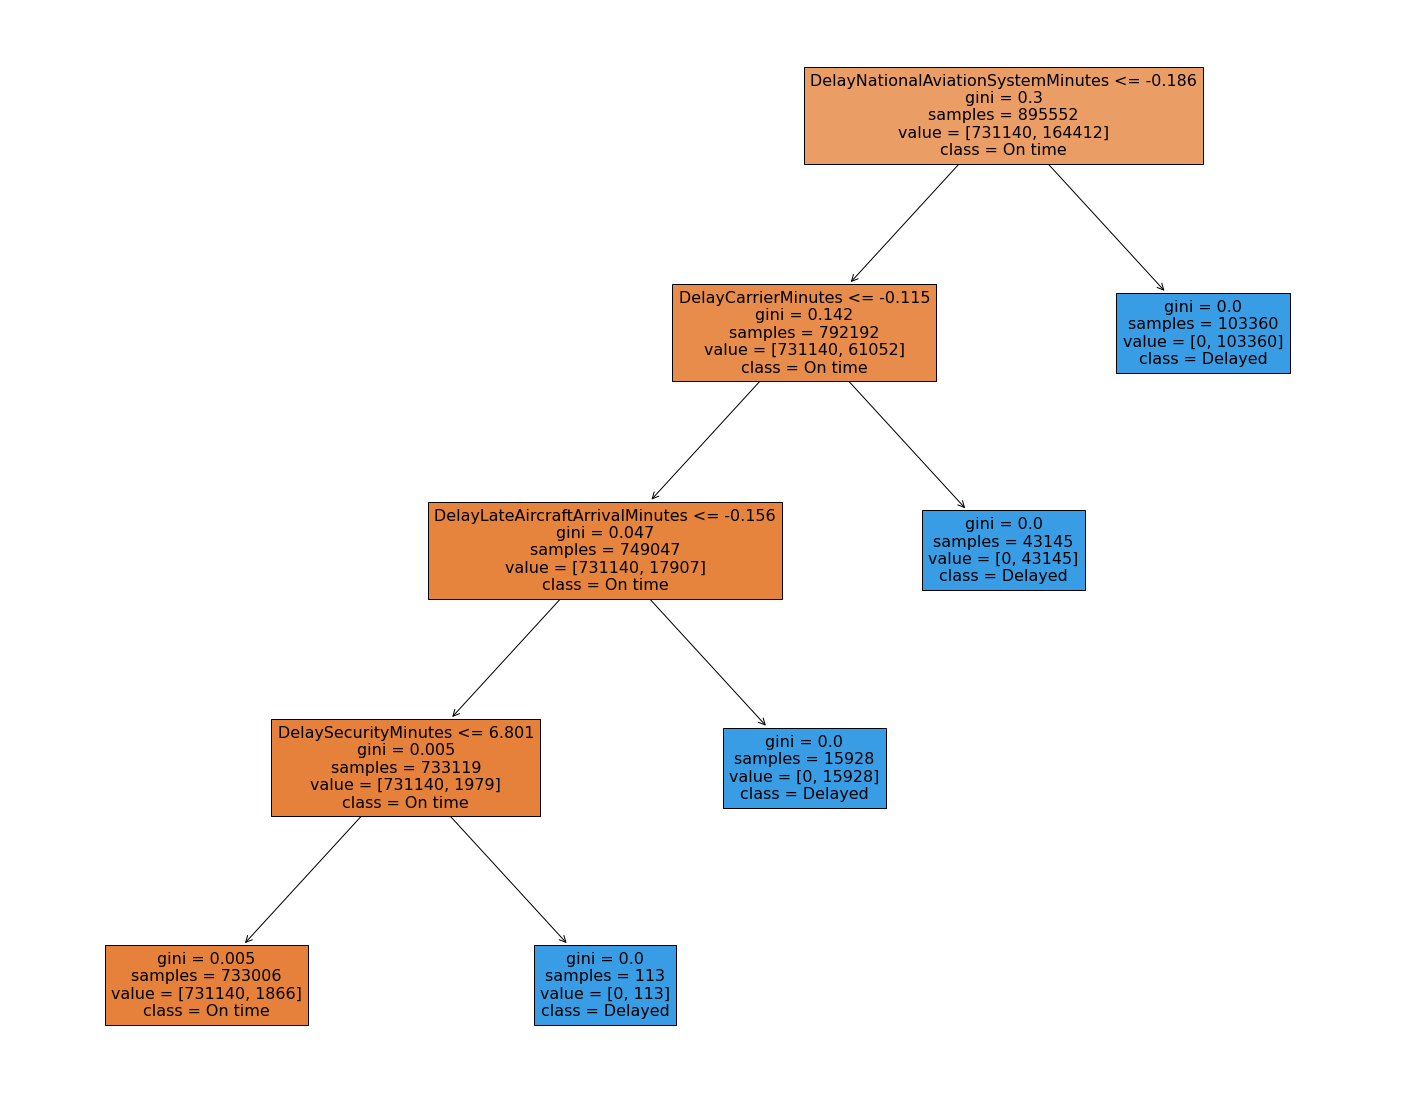

In [50]:
from sklearn import tree
target_values = ["On time", "Delayed"]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf, 
                   feature_names=X_train.columns,  
                   class_names=target_values,
                   filled=True)

In [115]:
fig.savefig('filename.png')